<a href="https://colab.research.google.com/github/SophMor/ColabUeb/blob/main/ClasificationTreesJazzSofi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importamos librerias
import pandas as pd #Data
import numpy as np #Calcular
import matplotlib.pyplot as plt # Dibujar
#Todo lo relacionado con el arbol
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
#Importamos datos
df = pd.read_csv("/content/Data_Cancer.csv", sep = ',')
print("\n Data cancer Dataset:\n")
df.head()


 Data cancer Dataset:



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Diccionario de Datos

- **id**: Identificador único del paciente.  
- **diagnosis**: Diagnóstico del tumor (M: Maligno, B: Benigno).  
- **radius_mean**: Radio promedio del tumor.  
- **texture_mean**: Textura promedio del tumor.  
- **perimeter_mean**: Perímetro promedio del tumor.  
- **area_mean**: Área promedio del tumor.  
- **smoothness_mean**: Suavidad promedio del tumor.  
- **compactness_mean**: Compacidad promedio del tumor.  
- **concavity_mean**: Concavidad promedio del tumor.  
- **concave points_mean**: Puntos cóncavos promedio del tumor.  
- **symmetry_mean**: Simetría promedio del tumor.  
- **fractal_dimension_mean**: Dimensión fractal promedio del tumor.  
- **radius_se**: Radio error estándar.  
- **texture_se**: Textura error estándar.  
- **perimeter_se**: Perímetro error estándar.  
- **area_se**: Área error estándar.  
- **smoothness_se**: Suavidad error estándar.  
- **compactness_se**: Compacidad error estándar.  
- **concavity_se**: Concavidad error estándar.  
- **concave points_se**: Puntos cóncavos error estándar.  
- **symmetry_se**: Simetría error estándar.  
- **fractal_dimension_se**: Dimensión fractal error estándar.  
- **radius_worst**: Radio peor caso.  
- **texture_worst**: Textura peor caso.  
- **perimeter_worst**: Perímetro peor caso.  
- **area_worst**: Área peor caso.  
- **smoothness_worst**: Suavidad peor caso.  
- **compactness_worst**: Compacidad peor caso.  
- **concavity_worst**: Concavidad peor caso.  
- **concave points_worst**: Puntos cóncavos peor caso.  
- **symmetry_worst**: Simetría peor caso.  
- **fractal_dimension_worst**: Dimensión fractal peor caso.  


In [ ]:
df.tail(9)  #show me the last

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
df.shape   #Te da la info de la tupla

(569, 33)

In [ ]:
df.info() # te da info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Manejo de las variables NaN y Missing Data.
Dado que el object nos muestra que hay algo raro ocurriendo

In [ ]:
categorical_features = df.select_dtypes("object").columns.to_list()
print(categorical_features, len(categorical_features)) # Imprime las var categoricas

['diagnosis'] 1


In [ ]:
numerical_features = df.select_dtypes({"int64", "float64"}).columns.to_list()
print(numerical_features)

['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [ ]:
count_uniques = df[numerical_features].apply(pd.Series.nunique, axis = 0)
count_uniques = pd.DataFrame({'count_uniques': count_uniques})
count_uniques.reset_index(inplace=True)
count_uniques.rename(columns={'index':'COLUMN_NAME'}, inplace=True)


In [ ]:
pd.set_option("display.max_rows", None)
#count_uniques
count_uniques.sort_values('count_uniques', ascending=True)

,COLUMN_NAME,count_uniques
31,Unnamed: 32,0
25,smoothness_worst,411
9,symmetry_mean,432
1,radius_mean,456
21,radius_worst,457
5,smoothness_mean,474
2,texture_mean,479
28,concave points_worst,492
19,symmetry_se,498
10,fractal_dimension_mean,499


In [ ]:
revision=count_uniques.loc[count_uniques['count_uniques'] <= 4].reset_index(drop=True)
revision.drop("count_uniques", axis=1,inplace= True)
revision = revision.values.flatten().tolist()

for variable in revision:
  var=df[variable].value_counts().to_frame()
  display(var)

,count
Unnamed: 32,


In [ ]:
numerical_features = df.select_dtypes({"int64","float64"}).columns.to_list()
numerical_missing = []
# % DE FALTANTES
for col in numerical_features:
        numerical_missing.append(df[col].isnull().sum() * 100 / len(df))

numerical_missing=pd.DataFrame({'column_name': numerical_features,'percent_missing': numerical_missing})
numerical_missing.sort_values('percent_missing',ascending=False, inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(numerical_missing)

                column_name  percent_missing
31              Unnamed: 32            100.0
0                        id              0.0
2              texture_mean              0.0
1               radius_mean              0.0
4                 area_mean              0.0
5           smoothness_mean              0.0
6          compactness_mean              0.0
3            perimeter_mean              0.0
8       concave points_mean              0.0
9             symmetry_mean              0.0
10   fractal_dimension_mean              0.0
11                radius_se              0.0
12               texture_se              0.0
13             perimeter_se              0.0
14                  area_se              0.0
7            concavity_mean              0.0
15            smoothness_se              0.0
16           compactness_se              0.0
18        concave points_se              0.0
17             concavity_se              0.0
20     fractal_dimension_se              0.0
21        

In [ ]:
df = df.drop(columns=['Unnamed: 32'])


In [ ]:
y = df["diagnosis"].map({"M":0, "B":1})
X = df.drop("diagnosis", axis=1)
#Binarización de la variable de interes para obtener "X" y "y"

In [ ]:
X.dtypes

,0
id,int64
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


Nos ahorramos el ONEHOTENCODER YA QUE NO TENEMOS CATEGORICAS

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

preprocessor = ColumnTransformer([
    ("numerical", "passthrough", numerical_features)
])

# Definir los modelos con el preprocesador
lr_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42))
])

dt_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(class_weight="balanced"))
])


In [ ]:
#División de los datos en conjuntos de entrenamiento de prueba
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=42)

Se evidencia que el 30 % de los datos prueba es entrenamiento 70% entrenamiento

In [ ]:
clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

# Versión preliminar de nuestro arbol


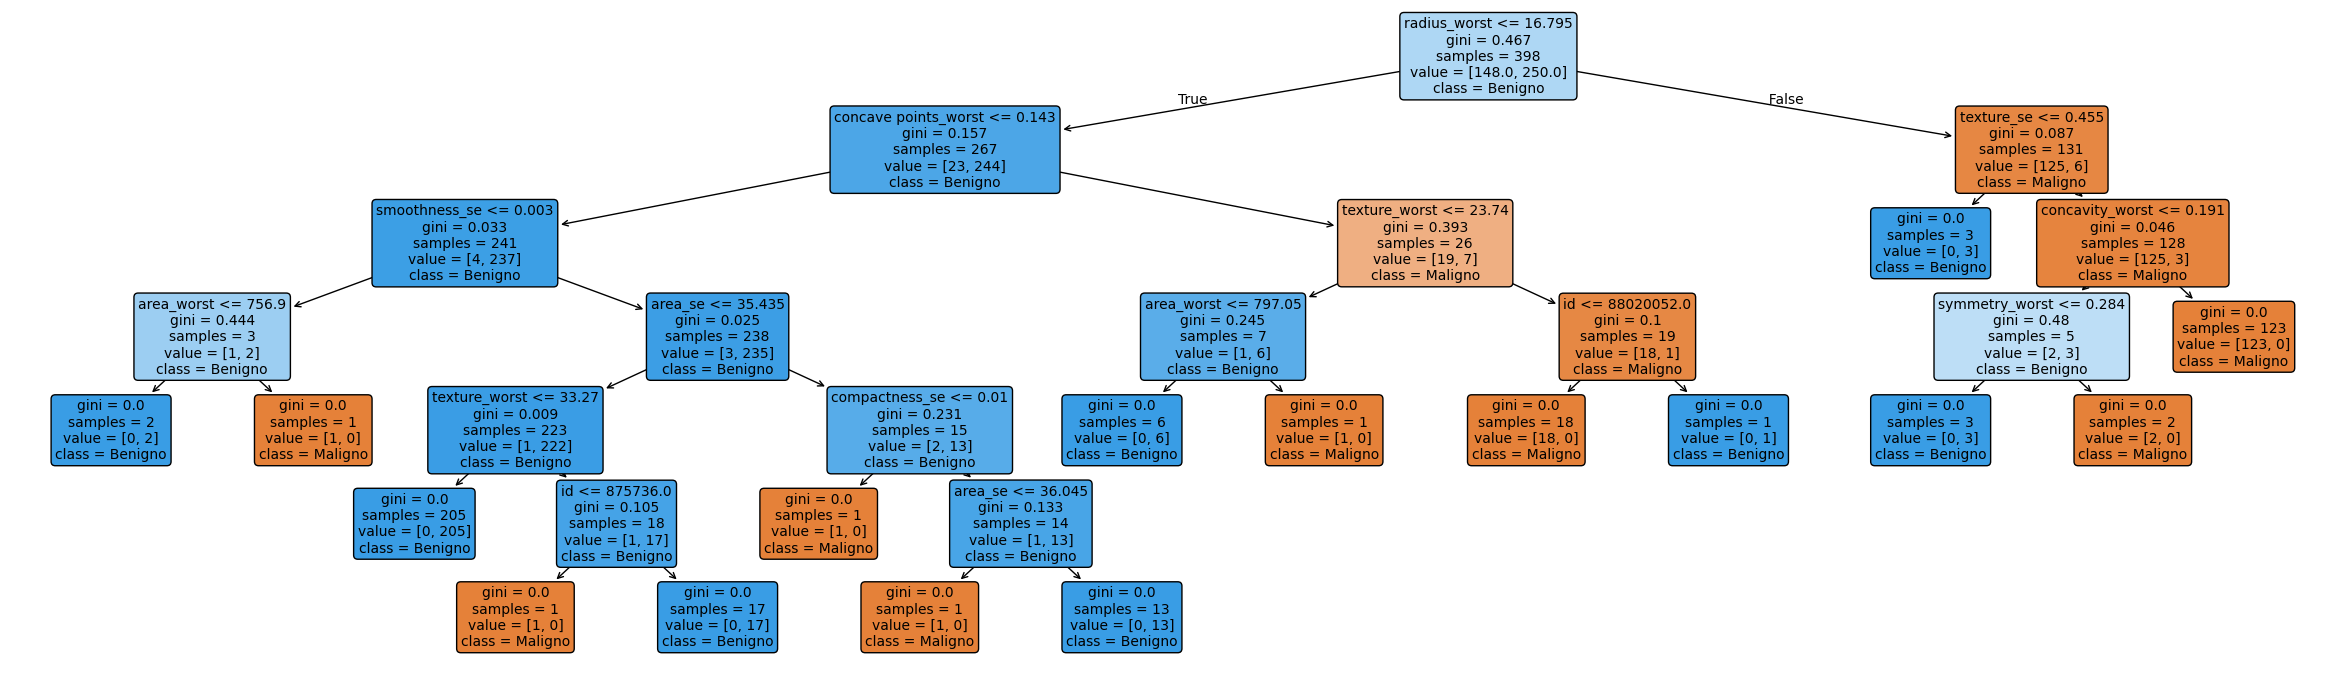

In [ ]:
plt.figure(figsize=(30,8.5));
plot_tree(
    clf_dt,
    filled=True,
    rounded = True,
    class_names=["Maligno", "Benigno"],
    feature_names=X.columns,
    fontsize=10);

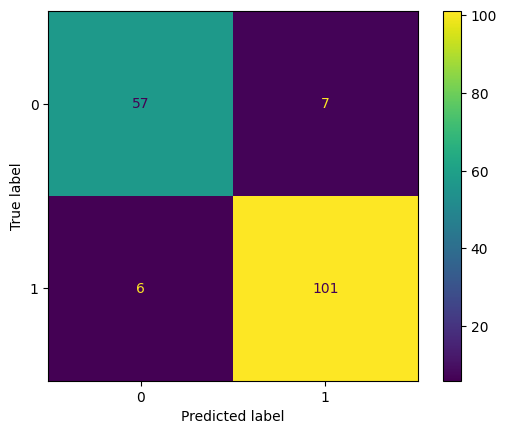

In [ ]:

predictions = clf_dt.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_dt.classes_)
disp.plot()
plt.show()

Se puedde ver que 57 que tiene un tumor maligno fueron correctamente clasificados como maligno. Miernetras que 99 fueron verdaderamente positivos.
Se ve que 8 fueron Falsos negativos y 7 tambien fueron falsos positivos.
Se evidencia que en el 4 cuadrante perteneciente a la diagonal principal tiene un valor de mayor valor que evidencia el mejor del modelo.

- Esquina sup izquierda verdadero positivo 😇
- Esquina sup derecha Falso positivo, la predicción dice que era negativo
- Esquina inferior derecha verdadero negativo. La predicción acierta


In [ ]:
accuracy_score = clf_dt.score(X_test, y_test)
print("Accuracy:", accuracy_score)

Accuracy: 0.9239766081871345


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        64
           1       0.94      0.94      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



Este informe, nos muestra que el modelo mide que tan bien identificauna parte especifica, en donde 89% de tumores malignos fueron correctamente classificados.
y los benignos 93% por lo que ambos tipos vemos pocos casos peligrosos como falsos positivos.

Text(0, 0.5, 'Feature')

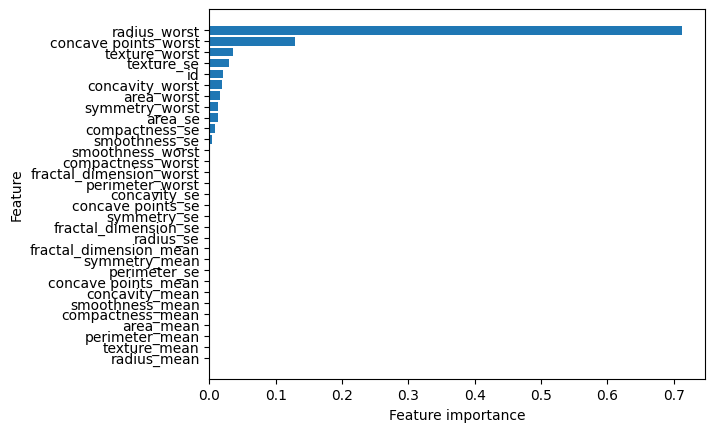

In [ ]:
feature_importance = clf_dt.feature_importances_
sorted_idx = feature_importance.argsort()
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature importance")
plt.ylabel("Feature")

In [ ]:
feature_importance = pd.DataFrame(clf_dt.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importance

,importance
radius_worst,0.712322
concave points_worst,0.128755
texture_worst,0.036164
texture_se,0.030071
id,0.020350
concavity_worst,0.018606
area_worst,0.016391
symmetry_worst,0.012908
area_se,0.012498
compactness_se,0.008657


Pero primero veamos el comportamiento con GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Reasegura que y es num
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
gs = GridSearchCV(dt_model, {"max_depth": [3, 5, 7],
                             "min_samples_split": [2, 5]},
                  n_jobs=-1, cv=5, scoring="accuracy")

gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_split': [2, 5]},
             scoring='accuracy')

In [ ]:
#Veamos nuestros mejores parámetros y puntuemos.
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 3, 'min_samples_split': 5}
0.942373417721519


In [ ]:
dt_model.set_params(**gs.best_params_)

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

In [ ]:
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy_score = dt_model.score(X_test, y_test)
print("Accuracy:", accuracy_score)

Accuracy: 0.9239766081871345


In [ ]:
print('Reporte de clasificación: \n')
print(classification_report(y_test, y_pred))

Reporte de clasificación: 

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        64
           1       0.93      0.95      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



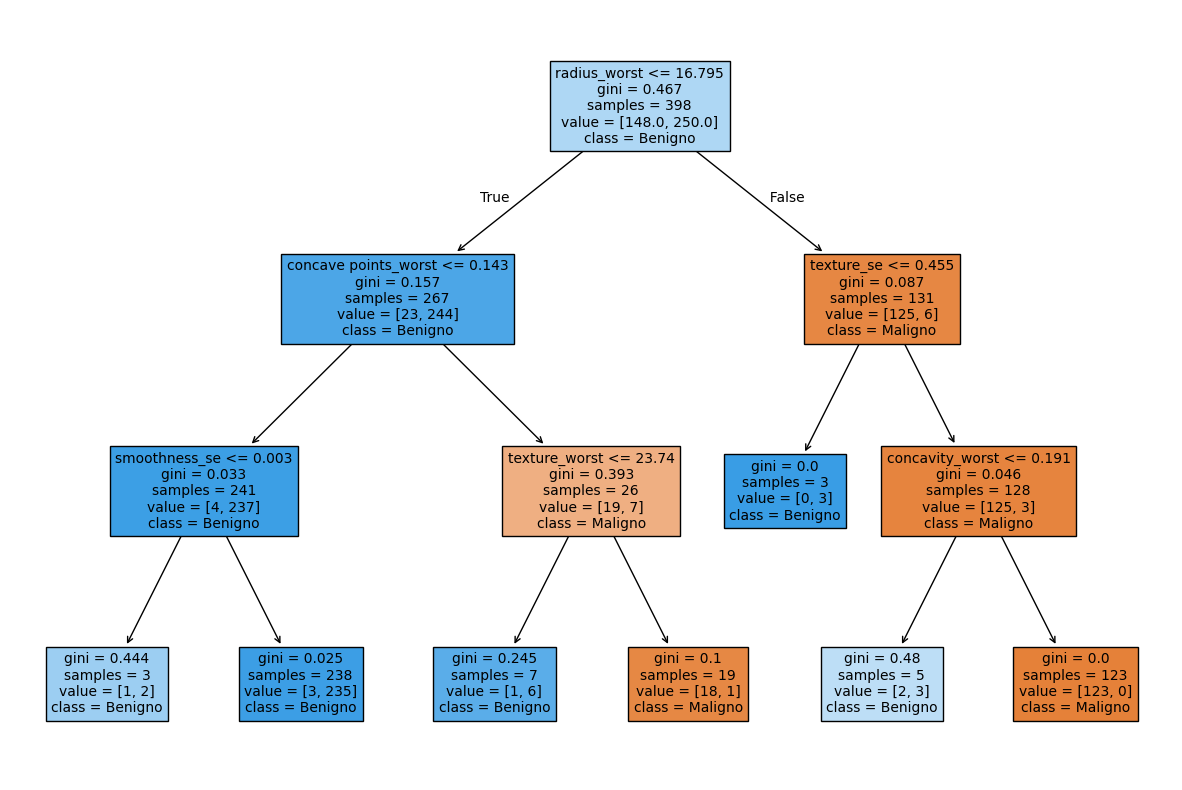

In [ ]:

plt.figure(figsize=(15,10))
plot_tree(dt_model, filled=True,
               feature_names=X_train.columns,
                class_names=["Maligno", "Benigno"],
               fontsize=10)
plt.show()


Como vemos que hay varios que no son fundamentales para el arbol vamos a pruning

In [ ]:
'''Los arboles de decision destacan por tener OVERFITTING
El modelo al tener en cuenta Max y min samples reduce overfitting
Sin embargo podemos aumentar el accuracy con pruning '''
#Esto se hace con cost Complexity
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities  # EXTRAEMOS LOS VALORES DE ALPHA
clf_dts = [] #ARRAY donde pone las dt
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)



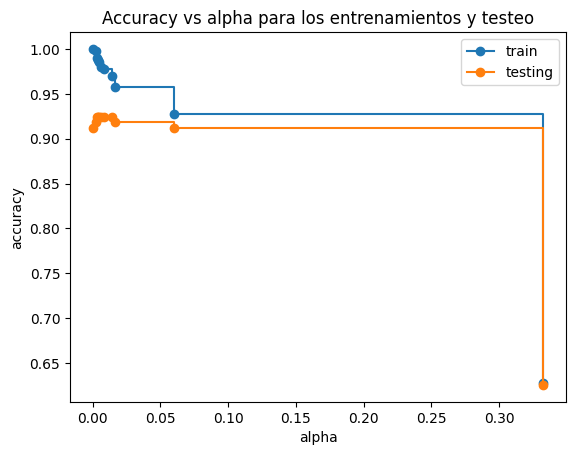

In [ ]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha para los entrenamientos y testeo")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="testing", drawstyle="steps-post")

ax.legend()
plt.show()

Cross-validation scores: [0.9122807  0.9122807  0.94736842 0.94736842 0.9380531 ]


<Axes: xlabel='tree'>

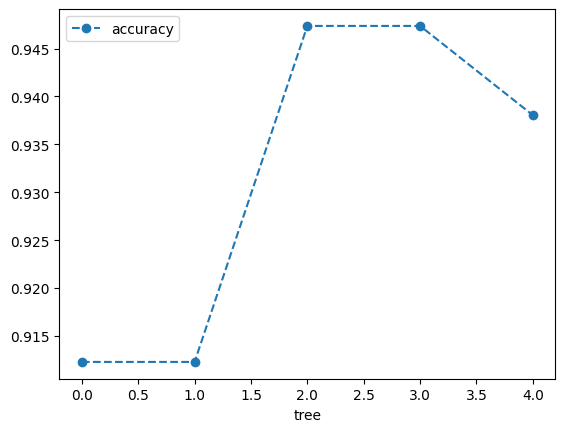

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.015)

scores = cross_val_score(clf_dt, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))
df = pd.DataFrame(data={'tree': range(5), 'accuracy':scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<Axes: xlabel='alpha'>

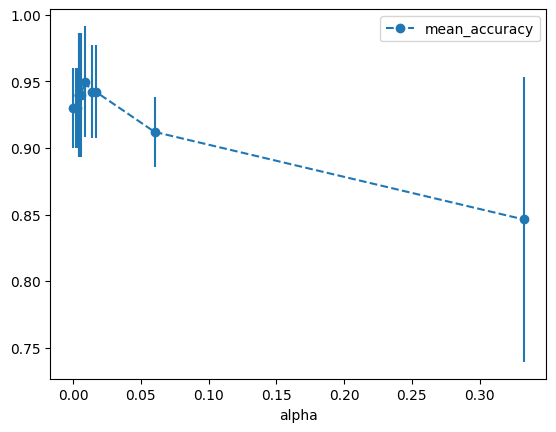

In [ ]:
#Muestra que que Cross validation nos deja encontras el valor optimo
alpha_loop_val = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt,X_train,y_train,cv=5)
    alpha_loop_val.append([ccp_alpha,np.mean(scores),np.std(scores)]) # Para cada alpha
    #Se corre 5 FCV

alpha_result = pd.DataFrame(alpha_loop_val,columns=['alpha','mean_accuracy','std'])
alpha_result.plot(x='alpha',
                  y='mean_accuracy',
                  yerr='std',marker='o',linestyle='--')


In [ ]:
#Por lo que al aumentar la ccp_alpha no es aduado porque eso nos acerca mas al overfitting
#Es por ello que necesitamos bajar un poco CCP_ALPHA
ideal_ccp_al = alpha_result[(alpha_result['alpha']>0.014) & (alpha_result['alpha']<0.015)] \
    .sort_values(by='mean_accuracy', ascending=False)

ideal_ccp_al


,alpha,mean_accuracy,std
7,0.014048,0.942373,0.034883


In [ ]:
ideal_ccp_alpha = float(ideal_ccp_al.iloc[0]['alpha'])
'''Construimos nuestro ARBOL DE DECISION'''
clf_dt_pruneado = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruneado = clf_dt_pruneado.fit(X_train, y_train)

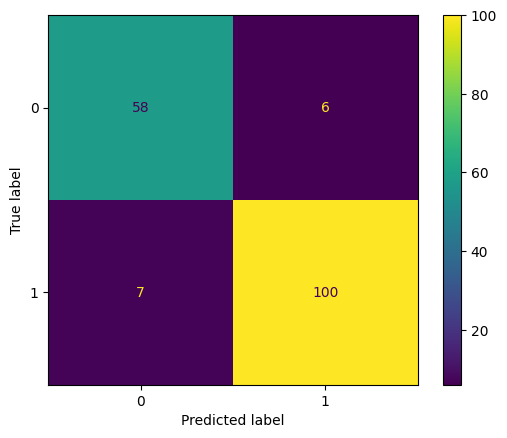

In [ ]:
#Hacemos nuestra confusion-matrix_

predictions = clf_dt_pruneado.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_dt_pruneado.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_dt_pruneado.classes_)
disp.plot()
plt.show()

En la primera fila del cuadrante se muestra  

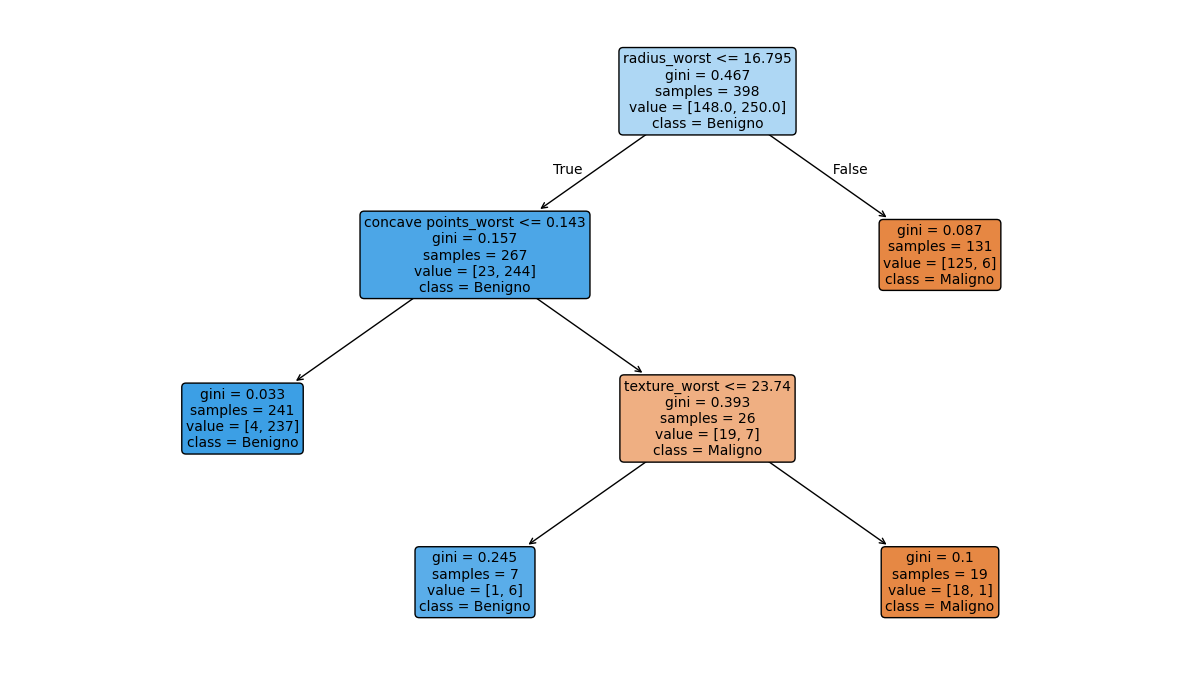

In [ ]:
plt.figure(figsize=(15,8.5));
plot_tree(
    clf_dt_pruneado,
    filled=True,
    rounded = True,
    class_names=["Maligno", "Benigno"],
    feature_names=X.columns,
    fontsize=10);

In [ ]:
accuracy_score_pr = clf_dt_pruneado.score(X_test, y_test)
print("Accuracy:", accuracy_score_pr)

Accuracy: 0.9239766081871345


In [ ]:
print('Reporte de clasificación: \n')
print(classification_report(y_test, y_pred))

Reporte de clasificación: 

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        64
           1       0.93      0.95      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171

